In [ ]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import boxcox
from statsmodels.stats import power
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kruskal
from scipy.stats import shapiro # Test Gaussian (50 to 200 samples)
from scipy.stats import levene # Test variance

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import kstest

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import numpy as np
import math

In [ ]:
!gdown 1o8PGtKv7k0RRWYLo81X4YYJW-SZNJyVQ

Downloading...
From: https://drive.google.com/uc?id=1o8PGtKv7k0RRWYLo81X4YYJW-SZNJyVQ
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 11.9MB/s]


In [ ]:
yulu_df = pd.read_csv("bike_sharing.csv")

In [ ]:
yulu_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
print(yulu_df.isna().sum())
print('\n')
print(yulu_df.isnull().sum())
print('\n')
print(yulu_df.head())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80  

In [ ]:
# Check the shape of the dataset
print("Shape of the dataset:")
print(yulu_df.shape)
print("\n")

# Check the data types of all the attributes
print("Data types of the attributes:")
print(yulu_df.dtypes)
print("\n")

# List columns with object data type (potential categorical columns)
print("Categorical columns (object data type):")
print(yulu_df.select_dtypes(include='object').columns)
print("\n")

# Get a statistical summary of the numeric data
print("Statistical summary of the numeric columns:")
print(yulu_df.describe())

Shape of the dataset:
(10886, 12)


Data types of the attributes:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


Categorical columns (object data type):
Index(['datetime'], dtype='object')


Statistical summary of the numeric columns:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000   

**Working Day has effect on number of electric cycles rented**

Normality Test (Kolmogorov-Smirnov):
Non-Working Day: KS Test p-value = 0.0000
  Reject H0: Data is not normally distributed.



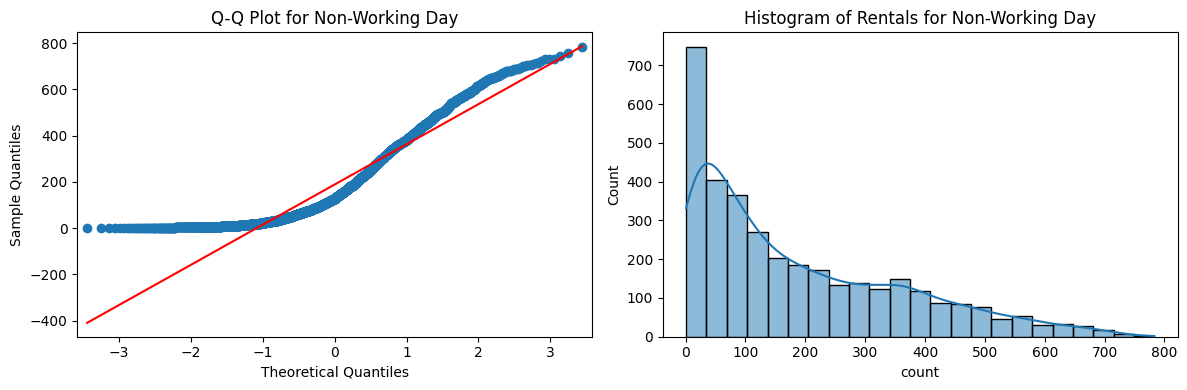

Working Day: KS Test p-value = 0.0000
  Reject H0: Data is not normally distributed.



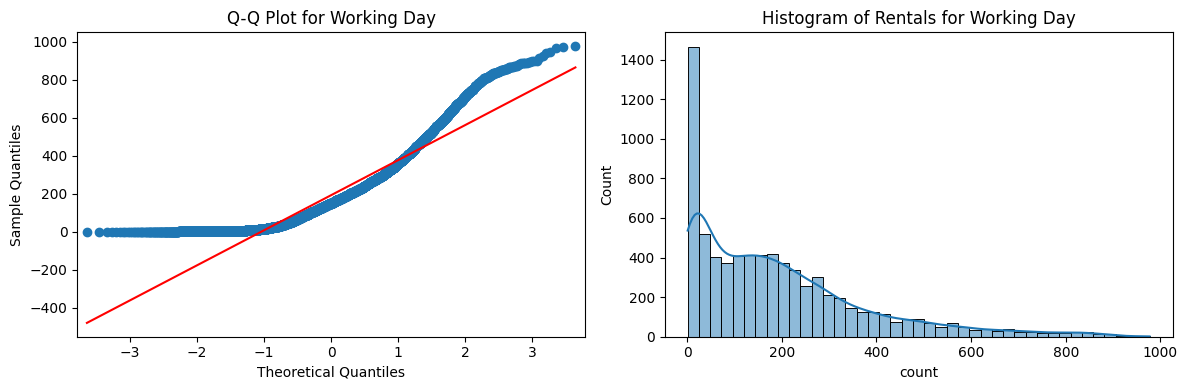


Levene's Test for Equal Variance: p-value = 0.9438
Fail to reject H0: Variances are equal.

Independent Samples T-Test Results:
  T-statistic = 1.2096
  p-value = 0.2264
Fail to reject H0: No significant effect of working day.


In [ ]:
working_day = yulu_df['workingday']
count = yulu_df['count']

# Separate data for working and non-working days
count_working = count[working_day == 1]
count_non_working = count[working_day == 0]

# Significance level
alpha = 0.05

# Null Hypothesis (H0): The data follows the specified distribution (e.g., normal distribution).
# Alternate Hypothesis (H1): The data does not follow the specified distribution.
# Step 1: Kolmogorov-Smirnov Test for Normality
print("Normality Test (Kolmogorov-Smirnov):")
for group, data in [("Non-Working Day", count_non_working), ("Working Day", count_working)]:
    # Kolmogorov-Smirnov Test for Normality
    ks_stat, ks_p_value = kstest(data.dropna(), 'norm', args=(data.mean(), data.std()))
    print(f"{group}: KS Test p-value = {ks_p_value:.4f}")

    # Decision based on Kolmogorov-Smirnov Test
    if ks_p_value < alpha:
        print("  Reject H0: Data is not normally distributed.\n")
    else:
        print("  Fail to reject H0: Data is normally distributed.\n")

    # Visual analysis using Q-Q plot and histogram in subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1]})

    # Q-Q plot
    qqplot(data.dropna(), line="s", ax=axes[0])  # Pass the correct subplot axis
    axes[0].set_title(f"Q-Q Plot for {group}")

    # Histogram
    sns.histplot(data.dropna(), kde=True, ax=axes[1])  # Pass the correct subplot axis
    axes[1].set_title(f"Histogram of Rentals for {group}")

    plt.tight_layout()
    plt.show()

# Step 2: Levene's Test for Equality of Variances
# Levene's test to compare the variance between working and non-working days
levene_stat, levene_p_value = levene(count_working, count_non_working)
print(f"\nLevene's Test for Equal Variance: p-value = {levene_p_value:.4f}")

# Decision based on Levene's Test
# Null Hypothesis (H0): Variances are equal
# Alternative Hypothesis (H1): Variances are not equal
if levene_p_value < alpha:
    print("Reject H0: Variances are not equal.")
else:
    print("Fail to reject H0: Variances are equal.")

# Step 3: Independent Samples T-Test
# T-test to compare means of working and non-working day rentals
# two-tailed t-test
t_stat, t_p_value = ttest_ind(count_working, count_non_working, equal_var=True)
print("\nIndependent Samples T-Test Results:")
print(f"  T-statistic = {t_stat:.4f}")
print(f"  p-value = {t_p_value:.4f}")

# Decision based on T-Test
# Null Hypothesis (H0): Working day has no effect on the rental count.
# Alternative Hypothesis (H1): Working day has a significant effect on the rental count.
if t_p_value < alpha:
    print("Reject H0: Working day has a significant effect on electric cycles rented.")
else:
    print("Fail to reject H0: No significant effect of working day.")


# Inference:
# The analysis suggests that whether it's a working day or not does not have a statistically significant impact on the number of electric cycles rented.
# The observed difference in rentals between working days and non-working days is likely due to random chance.

**No. of cycles rented similar or different in different seasons**

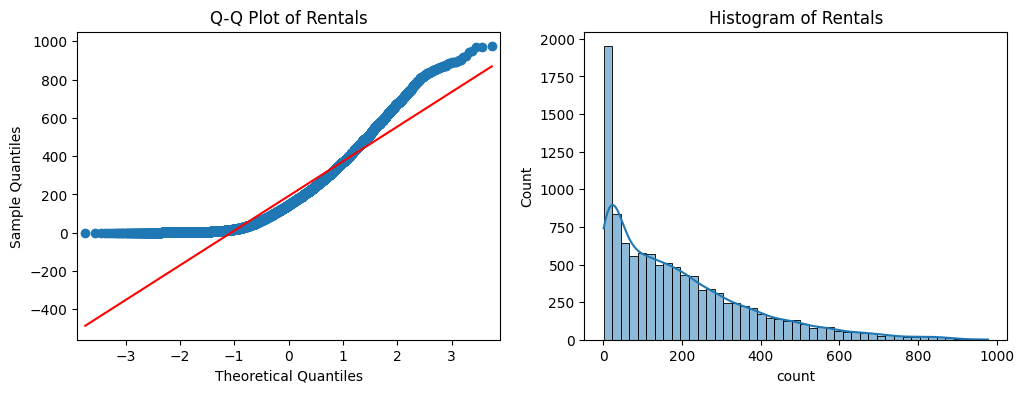

<Figure size 600x400 with 0 Axes>

Levene’s Test p-value: 1.0147116860043298e-118
Levene's Test: Reject the null hypothesis (Unequal variances).
KS Test p-value: 0.0000
KS Test: Reject the null hypothesis (Data is not normal).
Kruskal-Wallis Test Statistic: 699.6668548181988
Kruskal-Wallis Test p-value: 2.479008372608633e-151
Reject H0: At least one group has a different median.


In [ ]:
# Check for normality using histograms and Q-Q plot
# Visual analysis using Q-Q plot and histogram in subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1]})
# Q-Q plot for 'count' (total rentals)
plt.figure(figsize=(6, 4))
qqplot(yulu_df['count'].dropna(), line="s", ax=axes[0])
axes[0].set_title('Q-Q Plot of Rentals')

sns.histplot(yulu_df['count'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of Rentals')

plt.tight_layout()
plt.show()

# Set significance level
alpha = 0.05

# Hypotheses for normality tests
# Null Hypothesis (H0): The data follows a normal distribution.
# Alternative Hypothesis (H1): The data does not follow a normal distribution.

# Levene’s test for equal variance across seasons
levene_test = levene(
    yulu_df[yulu_df['season'] == 1]['count'],
    yulu_df[yulu_df['season'] == 2]['count'],
    yulu_df[yulu_df['season'] == 3]['count'],
    yulu_df[yulu_df['season'] == 4]['count']
)
print(f"Levene’s Test p-value: {levene_test.pvalue}")

# Decision based on Levene's Test
# Null Hypothesis (H0): Variances across seasons are equal.
# Alternative Hypothesis (H1): At least one season has a different variance.
if levene_test.pvalue < alpha:
    print("Levene's Test: Reject the null hypothesis (Unequal variances).")
else:
    print("Levene's Test: Fail to reject the null hypothesis (Equal variances).")

# Kolmogorov-Smirnov test for normality
# Compare the sample distribution to a normal distribution (mean and std deviation)
ks_stat, ks_p_value = kstest(yulu_df['count'].dropna(), 'norm', args=(yulu_df['count'].mean(), yulu_df['count'].std()))
print(f"KS Test p-value: {ks_p_value:.4f}")

# Decision based on Kolmogorov-Smirnov Test
# Null Hypothesis (H0): The data follows a normal distribution.
# Alternative Hypothesis (H1): The data does not follow a normal distribution.
if ks_p_value < alpha:
    print("KS Test: Reject the null hypothesis (Data is not normal).")
else:
    print("KS Test: Fail to reject the null hypothesis (Data is normal).")

# Conducting ANOVA to test if there is a significant difference in rentals across seasons
# Null Hypothesis (H0): The mean rental counts are equal across all seasons.
# Alternative Hypothesis (H1): At least one season has a different mean rental count.
# two-tailed test
stat, p_value = kruskal(yulu_df[yulu_df['season'] == 1]['count'],
    yulu_df[yulu_df['season'] == 2]['count'],
    yulu_df[yulu_df['season'] == 3]['count'],
    yulu_df[yulu_df['season'] == 4]['count'])
print("Kruskal-Wallis Test Statistic:", stat)
print("Kruskal-Wallis Test p-value:", p_value)

if p_value < alpha:
    print("Reject H0: At least one group has a different median.")
else:
    print("Fail to reject H0: All groups have the same median.")

# Inference:
# The analysis provides strong evidence that the number of electric cycles rented is significantly different across different seasons.
# The very low p-values from both the Levene and Kruskal-Wallis tests indicate a high level of confidence in this conclusion.
# The non-normality of the data, as indicated by the KS test, justifies the use of the Kruskal-Wallis test instead of ANOVA.

**No. of cycles rented similar or different in different weather**

Normality Test (Kolmogorov-Smirnov):
Weather condition 1: KS Test p-value = 0.0000
  Reject H0: Data is not normally distributed.


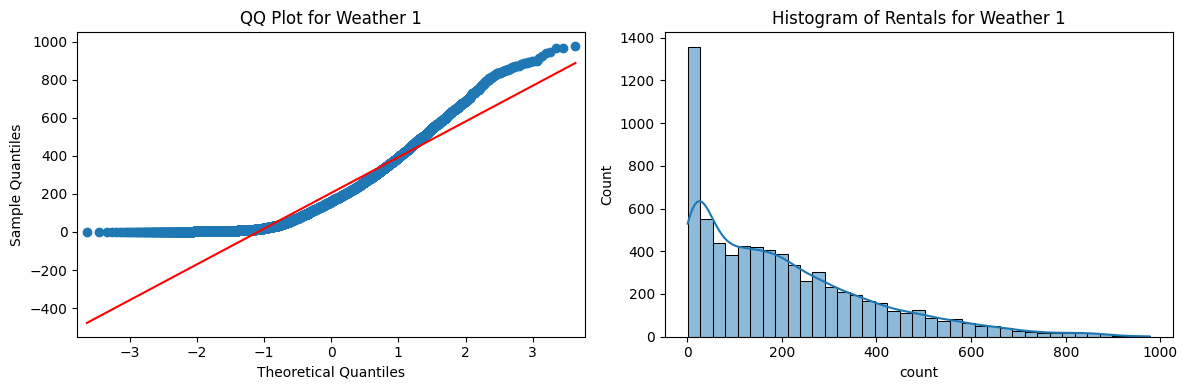

Weather condition 2: KS Test p-value = 0.0000
  Reject H0: Data is not normally distributed.


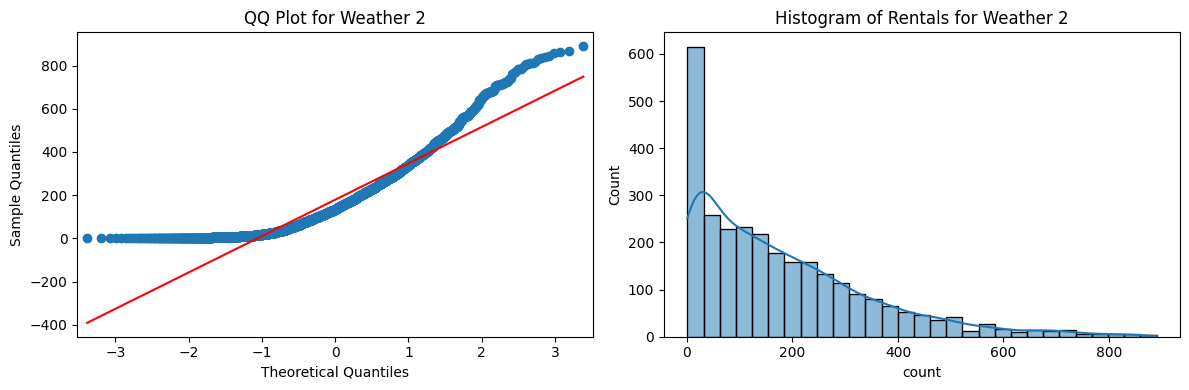

Weather condition 3: KS Test p-value = 0.0000
  Reject H0: Data is not normally distributed.


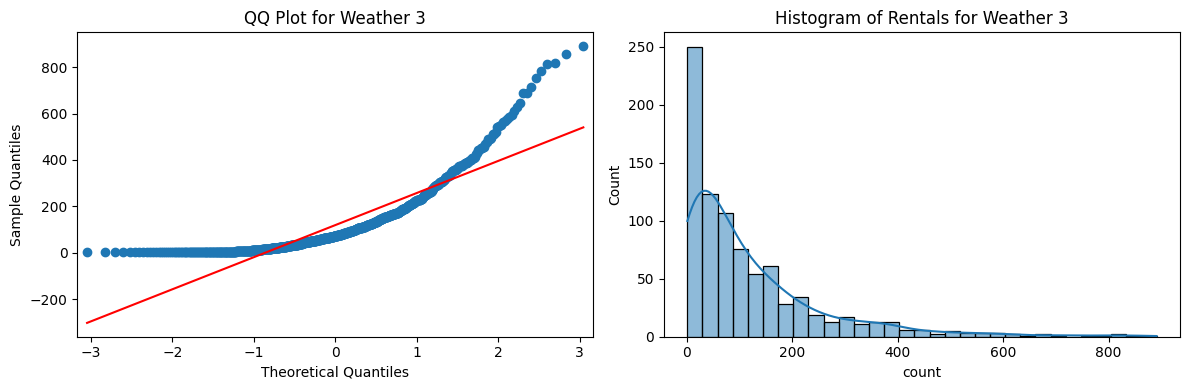

Weather condition 4: KS Test p-value = nan
  Fail to reject H0: Data is normally distributed.


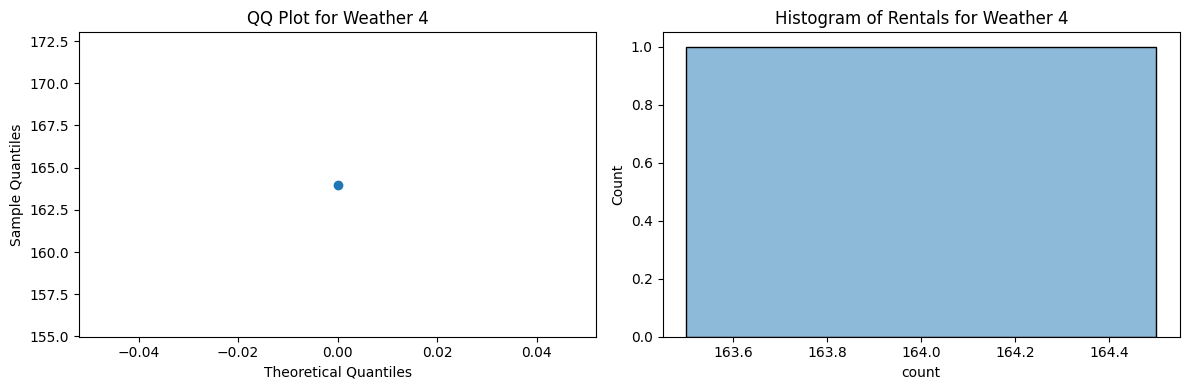


Levene's Test for Equal Variance: p-value = 0.0000
Reject H0: Variances are not equal across weather conditions.
Kruskal-Wallis Test Statistic: 205.00216514479087
Kruskal-Wallis Test p-value: 3.501611300708679e-44
Reject H0: At least one group has a different median.


In [ ]:
weather = yulu_df['weather']
count = yulu_df['count']

# Separate data for each weather condition
weather_conditions = yulu_df['weather'].unique()

# Significance level
alpha = 0.05

# Null Hypothesis (H0): The data follows the specified distribution (e.g., normal distribution).
# Alternate Hypothesis (H1): The data does not follow the specified distribution.
# Step 1: Kolmogorov-Smirnov Test for Normality
print("Normality Test (Kolmogorov-Smirnov):")
for condition in weather_conditions:
    group_data = count[weather == condition]
    ks_stat, ks_p_value = kstest(group_data.dropna(), 'norm', args=(group_data.mean(), group_data.std()))
    print(f"Weather condition {condition}: KS Test p-value = {ks_p_value:.4f}")

    # Decision based on Kolmogorov-Smirnov Test
    if ks_p_value < alpha:
        print("  Reject H0: Data is not normally distributed.")
    else:
        print("  Fail to reject H0: Data is normally distributed.")

    # Visual analysis using Q-Q plot and histogram in subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1]})

    # Q-Q plot
    qqplot(group_data.dropna(), line="s", ax=axes[0])  # Pass the correct subplot axis
    axes[0].set_title(f"QQ Plot for Weather {condition}")

    # Histogram
    sns.histplot(group_data.dropna(), kde=True, ax=axes[1])  # Pass the correct subplot axis
    axes[1].set_title(f"Histogram of Rentals for Weather {condition}")

    plt.tight_layout()
    plt.show()

# Step 2: Levene's Test for Equality of Variances
# Levene's test to compare the variance across weather conditions
levene_test = levene(
    yulu_df[yulu_df['weather'] == 1]['count'],
    yulu_df[yulu_df['weather'] == 2]['count'],
    yulu_df[yulu_df['weather'] == 3]['count'],
    yulu_df[yulu_df['weather'] == 4]['count']
)
print(f"\nLevene's Test for Equal Variance: p-value = {levene_test.pvalue:.4f}")

# Decision based on Levene's Test
# Null Hypothesis (H0): Variances are equal across weather conditions
# Alternative Hypothesis (H1): Variances are not equal across weather conditions
if levene_test.pvalue < alpha:
    print("Reject H0: Variances are not equal across weather conditions.")
else:
    print("Fail to reject H0: Variances are equal across weather conditions.")

# Step 3: Kruskal-Wallis Test (or ANOVA if normality is satisfied) to test for significant differences
# Conducting Kruskal-Wallis test to test if there is a significant difference in rentals across weather conditions
# Null Hypothesis (H0): The median rental counts are equal across all weather conditions.
# Alternative Hypothesis (H1): At least one weather condition has a different median rental count.
# two-tailed test
stat, p_value = kruskal(
    yulu_df[yulu_df['weather'] == 1]['count'],
    yulu_df[yulu_df['weather'] == 2]['count'],
    yulu_df[yulu_df['weather'] == 3]['count'],
    yulu_df[yulu_df['weather'] == 4]['count']
)
print("Kruskal-Wallis Test Statistic:", stat)
print("Kruskal-Wallis Test p-value:", p_value)

# Decision based on Kruskal-Wallis Test
if p_value < alpha:
    print("Reject H0: At least one group has a different median.")
else:
    print("Fail to reject H0: All groups have the same median.")

# Inference:
# The analysis provides strong evidence that the number of electric cycles rented is significantly different across different weather conditions.
# The non-normality of the data (indicated by the KS test) and the unequal variances (indicated by Levene's test) justify the use of the non-parametric Kruskal-Wallis test.
# The very low p-value from the Kruskal-Wallis test strongly supports the conclusion that weather has a significant impact on cycle rentals.

**Weather is dependent on season (check between 2 predictor variable)**

In [ ]:
# Null Hypothesis (H₀):
# - Weather and Season have no significant effect on rental count.
# - There is no interaction effect between Weather and Season on rental count.

# Alternative Hypothesis (H₁):
# - At least one of Weather or Season significantly affects rental count.
# - There is a significant interaction effect between Weather and Season on rental count.

# Fit a two-way ANOVA model
anova_model = ols('count ~ C(weather) + C(season) + C(weather):C(season)', data=yulu_df).fit()
anova_results = sm.stats.anova_lm(anova_model)

# Set significance level
alpha = 0.05

# Print results
print("Two-Way ANOVA Results:")
print(anova_results)

# Extract p-values for each factor
p_weather = anova_results["PR(>F)"].iloc[0]   # Weather
p_season = anova_results["PR(>F)"].iloc[1]    # Season
p_interaction = anova_results["PR(>F)"].iloc[2]  # Interaction (Weather × Season)

# Compare p-values with alpha (0.05)
print("\nHypothesis Testing Results:")

if p_weather < alpha:
    print("Reject H₀: Weather significantly affects rental count.")
else:
    print("Fail to reject H₀: Weather does not significantly affect rental count.")

if p_season < alpha:
    print("Reject H₀: Season significantly affects rental count.")
else:
    print("Fail to reject H₀: Season does not significantly affect rental count.")

if p_interaction < alpha:
    print("Reject H₀: There is a significant interaction effect between Weather and Season.")
else:
    print("Fail to reject H₀: No significant interaction effect between Weather and Season.")

# Inference:
# The two-way ANOVA reveals a statistically significant interaction between weather and season on the number of electric cycles rented.
# This means that the effect of weather on rentals is not consistent across different seasons.
# The impact of a particular weather condition (e.g., rain) might be very different in summer compared to winter.
# While both weather and season independently affect rentals, their *combined* effect is more complex and needs to be considered.


Two-Way ANOVA Results:
                           df        sum_sq       mean_sq           F  \
C(weather)                3.0  6.338070e+06  2.112690e+06   69.887591   
C(season)                 3.0  2.158708e+07  7.195692e+06  238.032851   
C(weather):C(season)      9.0  5.716762e+05  6.351957e+04    2.101222   
Residual              10873.0  3.286889e+08  3.022983e+04         NaN   

                             PR(>F)  
C(weather)             9.254158e-45  
C(season)             1.350921e-149  
C(weather):C(season)   2.605103e-02  
Residual                        NaN  

Hypothesis Testing Results:
Reject H₀: Weather significantly affects rental count.
Reject H₀: Season significantly affects rental count.
Reject H₀: There is a significant interaction effect between Weather and Season.


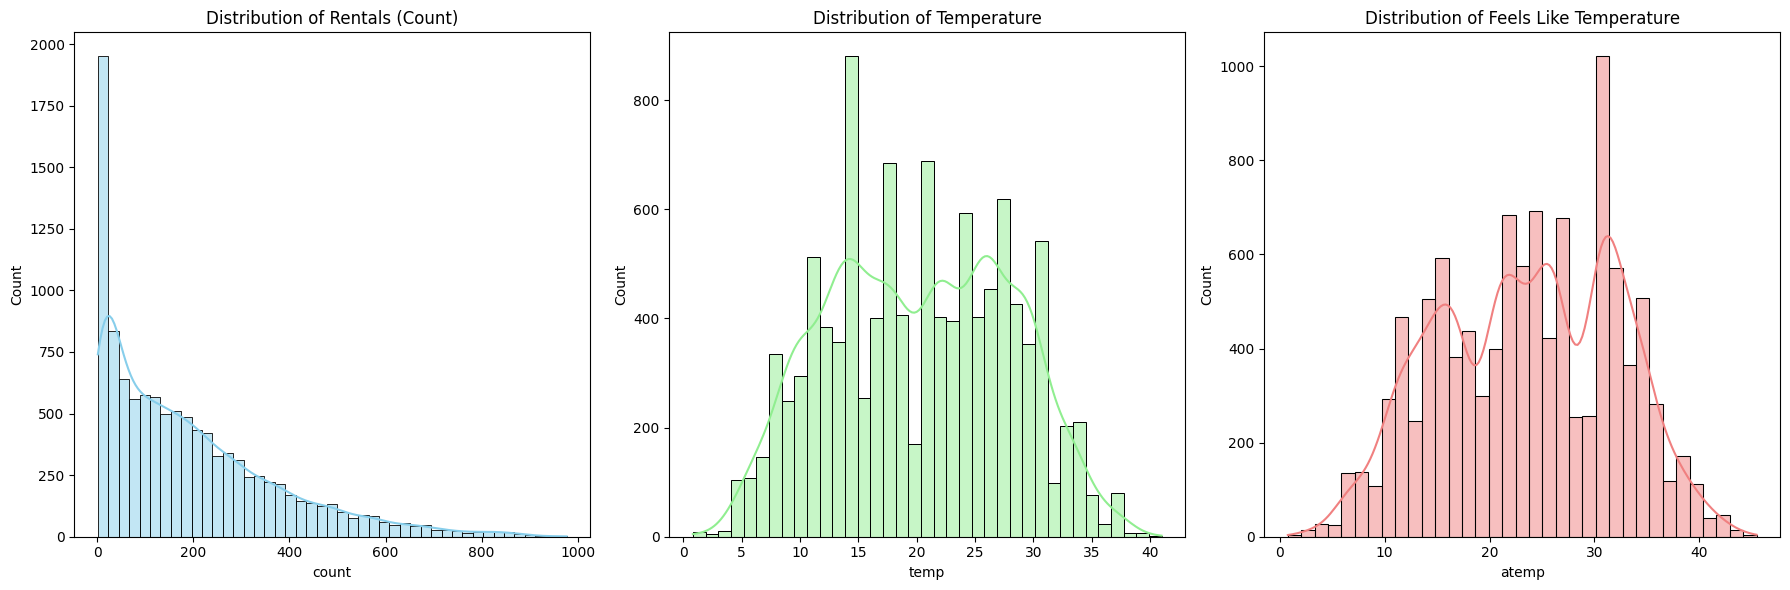

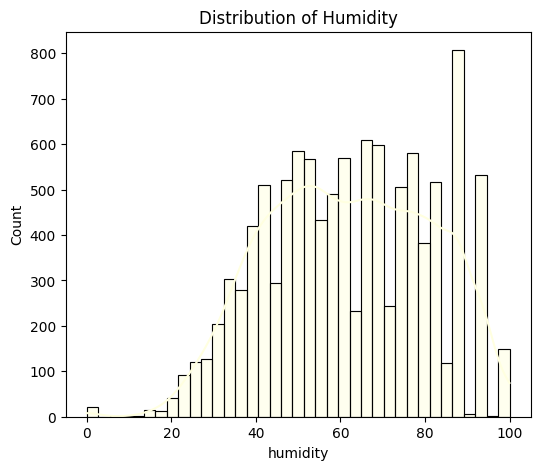

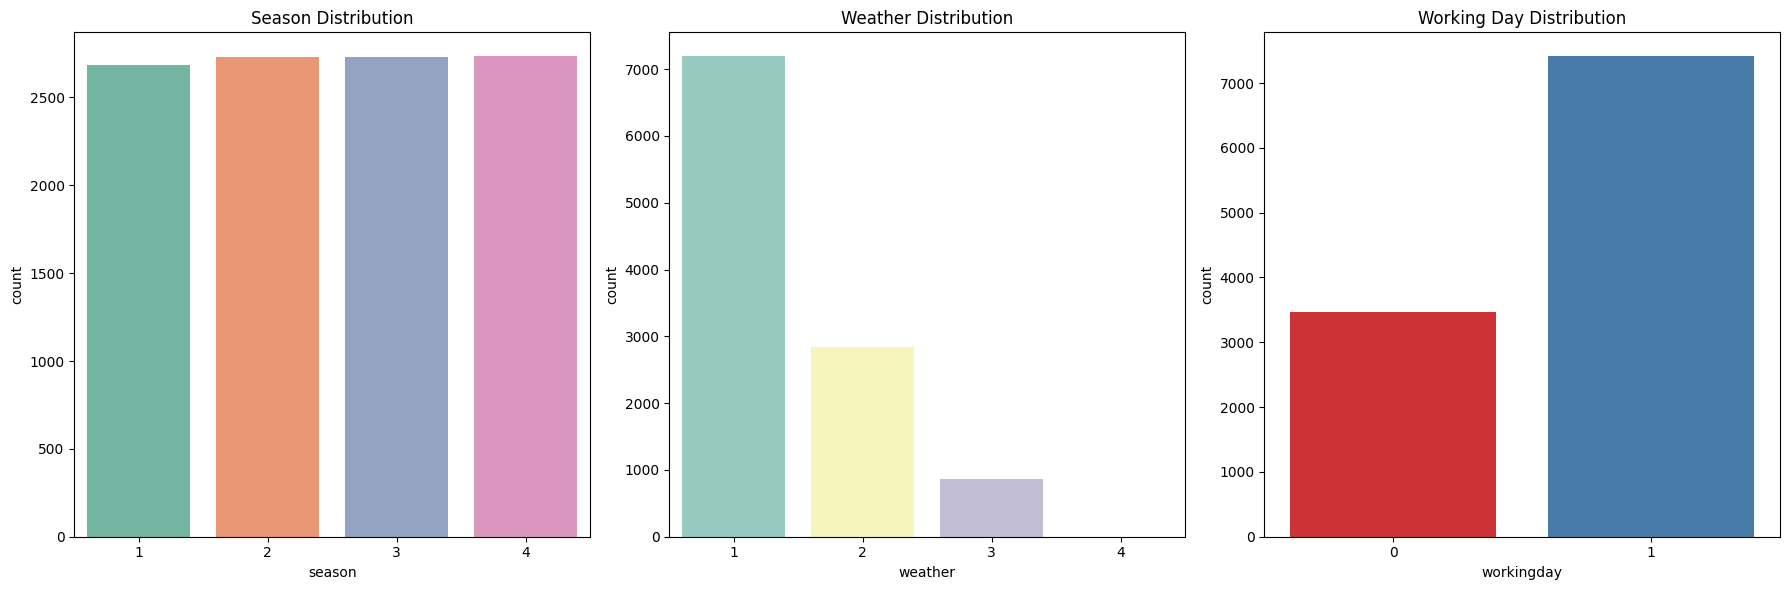

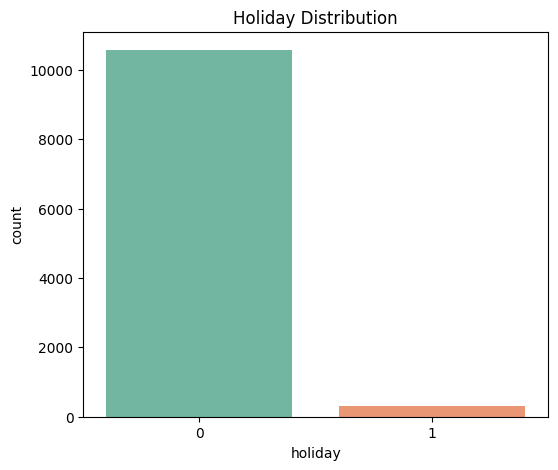

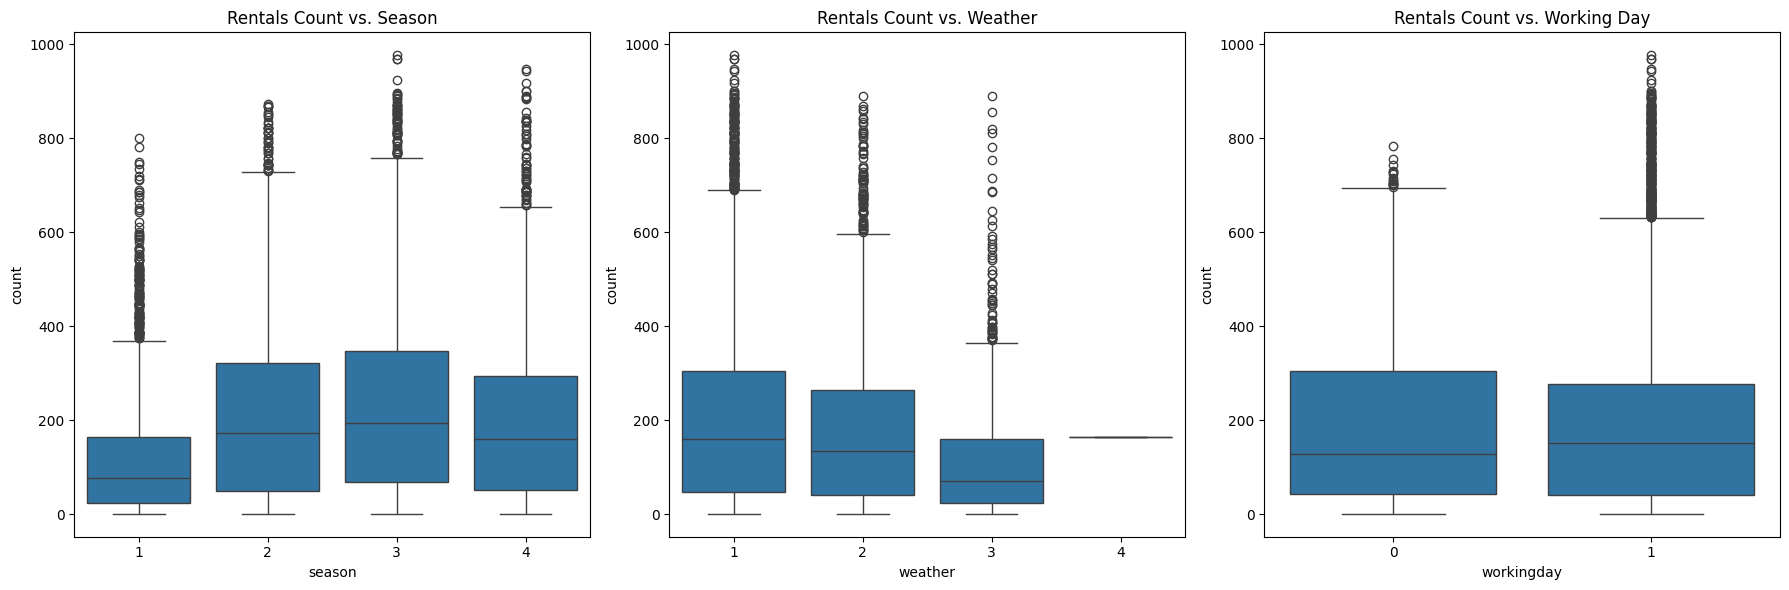

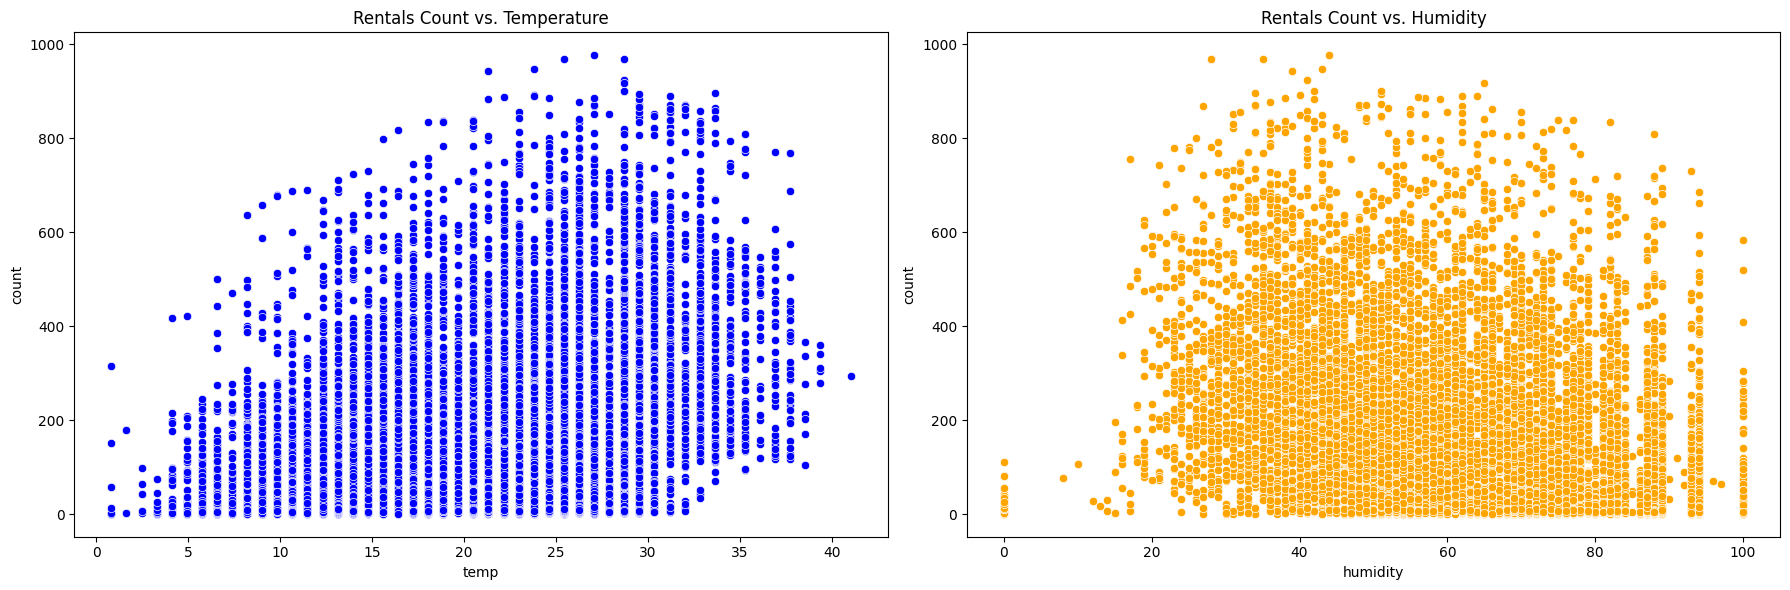

In [ ]:
# 1. Univariate Analysis
# 1.1 Distribution plots for continuous variables
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(yulu_df['count'], kde=True, color='skyblue')
plt.title('Distribution of Rentals (Count)')

plt.subplot(1, 3, 2)
sns.histplot(yulu_df['temp'], kde=True, color='lightgreen')
plt.title('Distribution of Temperature')

plt.subplot(1, 3, 3)
sns.histplot(yulu_df['atemp'], kde=True, color='lightcoral')
plt.title('Distribution of Feels Like Temperature')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.histplot(yulu_df['humidity'], kde=True, color='lightyellow')
plt.title('Distribution of Humidity')
plt.show()

# 1.2 Count plot for categorical variables (Rearranged into a single row)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='season', data=yulu_df, hue='season', palette='Set2', legend=False)
plt.title('Season Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='weather', data=yulu_df, hue='weather', palette='Set3', legend=False)
plt.title('Weather Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='workingday', data=yulu_df, hue='workingday', palette='Set1', legend=False)
plt.title('Working Day Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.countplot(x='holiday', data=yulu_df, hue='holiday', palette='Set2', legend=False)
plt.title('Holiday Distribution')
plt.show()

# 2. Bivariate Analysis (3 graphs in one row)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='season', y='count', data=yulu_df)
plt.title('Rentals Count vs. Season')

plt.subplot(1, 3, 2)
sns.boxplot(x='weather', y='count', data=yulu_df)
plt.title('Rentals Count vs. Weather')

plt.subplot(1, 3, 3)
sns.boxplot(x='workingday', y='count', data=yulu_df)
plt.title('Rentals Count vs. Working Day')

plt.tight_layout()
plt.show()

# 2.4 & 2.5 Scatter plots for numerical variables (placed in a single row)
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='count', data=yulu_df, color='blue')
plt.title('Rentals Count vs. Temperature')

plt.subplot(1, 2, 2)
sns.scatterplot(x='humidity', y='count', data=yulu_df, color='orange')
plt.title('Rentals Count vs. Humidity')

plt.tight_layout()
plt.show()

# --- Summary of EDA related to Categorical Variables (Season, Weather, Working Day) ---

# This section summarizes the findings from the exploratory data analysis (EDA) focused on the categorical variables: season, weather, and working day status, and their relationship with the rental counts.

# 1. Distribution of Categorical Variables:

# Season:
# - The dataset exhibits a balanced representation across all seasons, with each season having a roughly equal number of observations.
# - This balanced distribution is ideal for analysis as it prevents bias due to overrepresentation of any particular season.

# Weather:
# - The distribution of weather conditions is highly imbalanced.
# - Weather condition 1 is the most frequent, followed by conditions 2 and 3, while condition 4 is very rare.
# - This imbalance needs to be considered during analysis, as it could skew results or limit the insights gained about less frequent weather conditions.

# Working Day:
# - The dataset contains more non-working days than working days, indicating an imbalanced distribution.
# - This imbalance could affect the analysis of the impact of working day status on rentals and may require techniques to mitigate its effects.

# 2. Relationship with Rental Counts:

# Season:
# - A strong seasonal pattern is observed in rental counts.
# - Rentals are highest during season 3 (likely Summer or a peak season) and lowest during season 4 (likely Winter or a low season).
# - Seasons 1 and 2 show moderate rental activity.

# Weather:
# - Rental counts are highly dependent on weather conditions.
# - Weather condition 1 is associated with the highest rental counts, suggesting favorable weather.
# - Rental counts decrease progressively from weather conditions 1 to 3.
# - Weather condition 4 shows extremely low or near-zero rentals, indicating it likely represents severe weather where rentals are not feasible.

# Working Day:
# - The difference in rental counts between working days and non-working days is less pronounced compared to season and weather.
# - Non-working days tend to have slightly higher median rentals and greater variability, possibly due to leisure-related rentals.

# 3. Key Observations and Considerations:

# - Season, weather, and working day status all appear to influence rental counts, but to varying degrees.
# - Season and weather exhibit the strongest relationships with rentals.
# - The imbalanced distributions of weather conditions and working days need to be addressed in further analysis to ensure reliable and unbiased results.
# - Further analysis should explore the combined effects of these categorical variables and consider other potential influencing factors (e.g., time of day, holidays).
# - Statistical tests (e.g., ANOVA, Kruskal-Wallis) can be used to formally assess the statistical significance of the observed differences in rentals across categories.


**2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

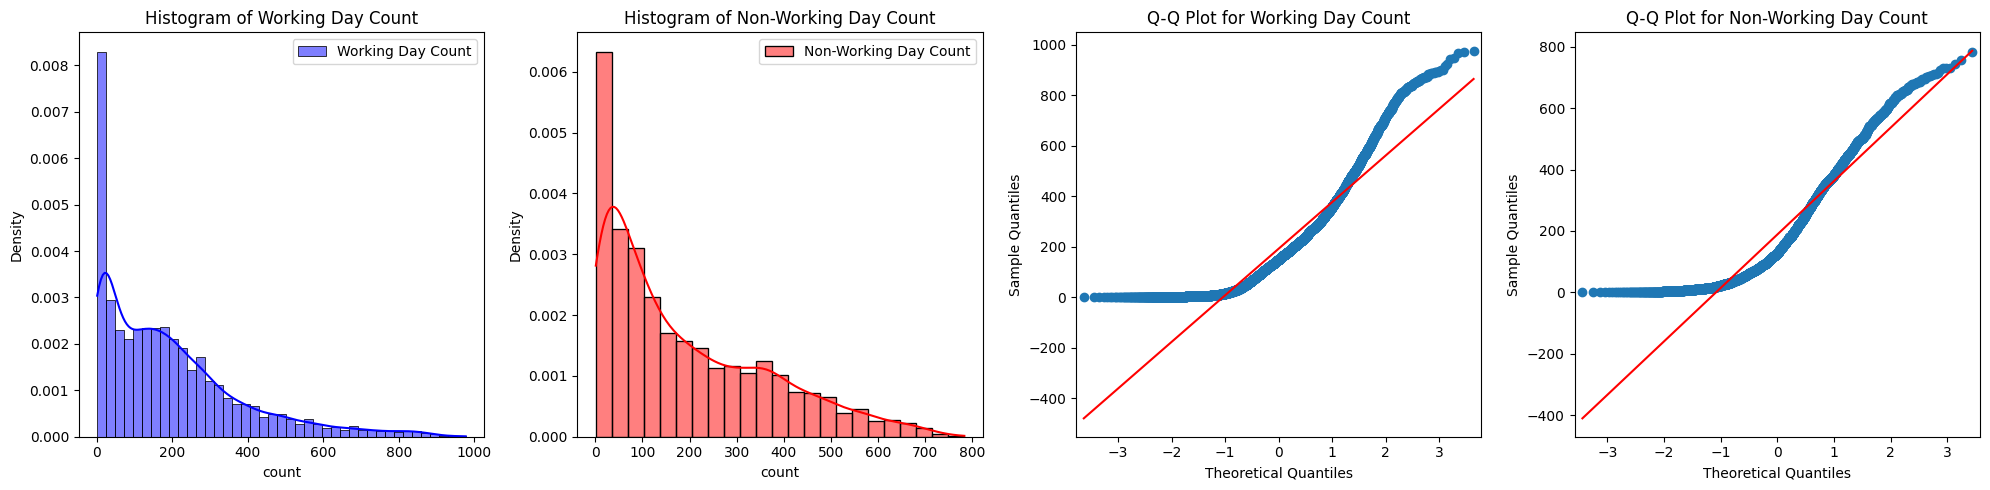

Levene's Test - p-value: 0.9437823280916695
Fail to reject the null hypothesis for Levene's test: The variances are not significantly different.

Shapiro-Wilk Test for Working Day p-value: 2.2521124830019574e-61
Shapiro-Wilk Test for Non-Working Day p-value: 4.4728547627911074e-45
Reject the null hypothesis for Shapiro-Wilk test (Working Day): Data is not normally distributed.

Reject the null hypothesis for Shapiro-Wilk test (Non-Working Day): Data is not normally distributed.

KS Test for Working Day p-value = 0.0000
  Reject H0: Data is not normally distributed.

KS Test for Non-Working Day p-value = 0.0000
  Reject H0: Data is not normally distributed.

T-statistic: 1.2096277376026694, P-value: 0.22644804226361348
Fail to reject the null hypothesis: There is no significant difference in the average number of bike rentals between working and non-working days.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Separate the data into two groups based on workingday
working_day_count = yulu_df[yulu_df['workingday'] == 1]['count']
non_working_day_count = yulu_df[yulu_df['workingday'] == 0]['count']

# Create subplots for Histograms and Q-Q Plots in a single row
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# Histogram for Working Day Count
sns.histplot(working_day_count, kde=True, label='Working Day Count', color='blue', stat='density', ax=axes[0])
axes[0].legend()
axes[0].set_title('Histogram of Working Day Count')

# Histogram for Non-Working Day Count
sns.histplot(non_working_day_count, kde=True, label='Non-Working Day Count', color='red', stat='density', ax=axes[1])
axes[1].legend()
axes[1].set_title('Histogram of Non-Working Day Count')

# Q-Q plot for Working Day Count
qqplot(working_day_count.dropna(), line="s", ax=axes[2])
axes[2].set_title('Q-Q Plot for Working Day Count')

# Q-Q plot for Non-Working Day Count
qqplot(non_working_day_count.dropna(), line="s", ax=axes[3])
axes[3].set_title('Q-Q Plot for Non-Working Day Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Set significance level
alpha = 0.05

# Levene’s Test for Equal Variance
stat, p_value_levene = levene(working_day_count, non_working_day_count)
print(f"Levene's Test - p-value: {p_value_levene}")
if p_value_levene < alpha:
    print("Reject the null hypothesis for Levene's test: The variances are significantly different.\n")
else:
    print("Fail to reject the null hypothesis for Levene's test: The variances are not significantly different.\n")

# Shapiro-Wilk Test for Normality
stat_working, p_value_working = shapiro(working_day_count)
stat_non_working, p_value_non_working = shapiro(non_working_day_count)
print(f"Shapiro-Wilk Test for Working Day p-value: {p_value_working}")
print(f"Shapiro-Wilk Test for Non-Working Day p-value: {p_value_non_working}")

if p_value_working < alpha:
    print("Reject the null hypothesis for Shapiro-Wilk test (Working Day): Data is not normally distributed.\n")
else:
    print("Fail to reject the null hypothesis for Shapiro-Wilk test (Working Day): Data is normally distributed.\n")

if p_value_non_working < alpha:
    print("Reject the null hypothesis for Shapiro-Wilk test (Non-Working Day): Data is not normally distributed.\n")
else:
    print("Fail to reject the null hypothesis for Shapiro-Wilk test (Non-Working Day): Data is normally distributed.\n")

# Kolmogorov-Smirnov Test for Normality
ks_stat, ks_p_value = kstest(working_day_count.dropna(), 'norm', args=(working_day_count.mean(), working_day_count.std()))
print(f"KS Test for Working Day p-value = {ks_p_value:.4f}")

if ks_p_value < alpha:
    print("  Reject H0: Data is not normally distributed.\n")
else:
    print("  Fail to reject H0: Data is normally distributed.\n")

ks_stat, ks_p_value = kstest(non_working_day_count.dropna(), 'norm', args=(non_working_day_count.mean(), non_working_day_count.std()))
print(f"KS Test for Non-Working Day p-value = {ks_p_value:.4f}")

if ks_p_value < alpha:
    print("  Reject H0: Data is not normally distributed.\n")
else:
    print("  Fail to reject H0: Data is normally distributed.\n")

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(working_day_count, non_working_day_count)

# Output the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average number of bike rentals between working and non-working days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of bike rentals between working and non-working days.")

# Important Considerations:
# The Shapiro-Wilk and KS tests indicate that the data is not normally distributed in either group.
# While the t-test can be somewhat robust to non-normality with large sample sizes (Central Limit Theorem),
# a non-parametric test is generally more appropriate when the data is clearly not normally distributed.


**ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season**

In [ ]:
# For Weather:
# Null Hypothesis (H0): The mean number of cycles rented is the same across all weather conditions.
# Alternative Hypothesis (H1): The mean number of cycles rented is significantly different across at least one weather condition.

# For Season:
# Null Hypothesis (H0): The mean number of cycles rented is the same across all seasons.
# Alternative Hypothesis (H1): The mean number of cycles rented is significantly different across at least one season.

# Interaction Effect Hypothesis (Weather × Season):
# Null Hypothesis (H0): There is no interaction between weather and season on the number of cycles rented (i.e., the effect of weather is the same across all seasons).
# Alternative Hypothesis (H1): There is a significant interaction between weather and season on the number of cycles rented (i.e., the effect of weather depends on the season).

# Fit a two-way ANOVA model (Weather and Season as categorical predictors)
anova_model = ols('count ~ C(weather) + C(season) + C(weather):C(season)', data=yulu_df).fit()
anova_results = sm.stats.anova_lm(anova_model)

# Print ANOVA table
print("Two-Way ANOVA Results:")
print(anova_results)

# Extract p-values
alpha = 0.05
p_value_weather = anova_results['PR(>F)'].iloc[0]
p_value_season = anova_results['PR(>F)'].iloc[1]
p_value_interaction = anova_results['PR(>F)'].iloc[2]

# Interpret results
if p_value_weather < alpha:
    print("Reject H₀: The number of cycles rented is significantly different across different weather conditions.\n")
else:
    print("Fail to reject H₀: The number of cycles rented is not significantly different across weather conditions.\n")

if p_value_season < alpha:
    print("Reject H₀: The number of cycles rented is significantly different across different seasons.\n")
else:
    print("Fail to reject H₀: The number of cycles rented is not significantly different across seasons.\n")

if p_value_interaction < alpha:
    print("Reject H₀: There is a significant interaction effect between weather and season on the number of cycles rented.\n")
else:
    print("Fail to reject H₀: There is no significant interaction effect between weather and season on the number of cycles rented.\n")

# Inference:
# The two-way ANOVA reveals statistically significant main effects for both weather and season, meaning that each factor independently influences the number of electric cycles rented.
# More importantly, the analysis shows a statistically significant *interaction* between weather and season.
# This indicates that the effect of weather on rentals varies depending on the season, and vice-versa.
# The impact of a particular weather condition (e.g., rain) is likely different in summer than it is in winter.
# The combined effect of weather and season is not simply additive; they influence rentals in a more complex, interconnected way.

Two-Way ANOVA Results:
                           df        sum_sq       mean_sq           F  \
C(weather)                3.0  6.338070e+06  2.112690e+06   69.887591   
C(season)                 3.0  2.158708e+07  7.195692e+06  238.032851   
C(weather):C(season)      9.0  5.716762e+05  6.351957e+04    2.101222   
Residual              10873.0  3.286889e+08  3.022983e+04         NaN   

                             PR(>F)  
C(weather)             9.254158e-45  
C(season)             1.350921e-149  
C(weather):C(season)   2.605103e-02  
Residual                        NaN  
Reject H₀: The number of cycles rented is significantly different across different weather conditions.

Reject H₀: The number of cycles rented is significantly different across different seasons.

Reject H₀: There is a significant interaction effect between weather and season on the number of cycles rented.



**Chi-square test to check if Weather is dependent on the season**





In [ ]:
# Create a contingency table for Weather and Season
contingency_table = pd.crosstab(yulu_df['weather'], yulu_df['season'])

# Perform the Chi-square test
# two-tailed
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square Test Results:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table: \n{expected}")
print(f"P-value: {p_value}")

# Check if the p-value is below alpha (0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Weather and Season are dependent (there is an association between them).")
else:
    print("Fail to reject the null hypothesis: Weather and Season are independent.")

# Inference:
# The Chi-square test indicates a statistically significant association between weather and season.
# This means that weather patterns are not evenly distributed across seasons.  Certain weather conditions are more likely to occur in some seasons than others.

Chi-square Test Results:
Chi2 Statistic: 49.15865559689363
Degrees of Freedom: 9
Expected Frequencies Table: 
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
P-value: 1.5499250736864862e-07
Reject the null hypothesis: Weather and Season are dependent (there is an association between them).
